In [ ]:
The dataset counts the median of about 500 owner-occupied homes in the Boston area. I try to study the median price in the Boston area to find out which variables will affect house prices in the Boston area. In this model, I mainly use linear regression and global principal component analysis to build the model, and use MSE to evaluate the pros and cons of the model.

Data cleaning before the project： 
I quickly browsed the original data and undoubtedly found a strong correlation between NOX (Nitrogen oxide concentration) and INDUS (Industrail business acres by town) and TAX. To prevent collinearity, NOX and INDUS model The contribution was minimal, I deleted the two columns and made the original form 'Boston1'. There is no missing data in the data.

In [24]:
#import necessary package and the csv file 
import numpy as np
import pandas as pd
import sklearn
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
df=pd.read_csv('boston1.csv')
print ("Dataset Lenght:: ", len(df)) 
print ("Dataset Shape:: ", df.shape)
df.head()

Dataset Lenght::  506
Dataset Shape::  (506, 5)


,MV,RM,TAX,PT,LSTAT
0,24.0,6.575,296,15.3,4.98
1,21.6,6.421,242,17.8,9.14
2,34.7,7.185,242,17.8,4.03
3,33.4,6.998,222,18.7,2.94
4,36.2,7.147,222,18.7,5.33


In [27]:
#Explain the meaning of the variable：
#MV: Median value of owner-occupied homes
#RM: The number of room in owner-occupied units
#TAX: The property tax rate (per 10,000 dallars)
#PT: Pupil/teacher ration by town school district
#LSTAT: The ratio of lower income-status population

the mean of Median value of owner-occupied homes is : 22.532806324110698 thousands dollars
the mean of average of numbers of room in owner-occupied units is : 6.284634387351788
the property tax rate (per 10,000 dallars) is  408.2371541501976 dollars


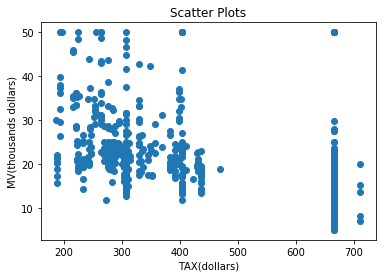

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


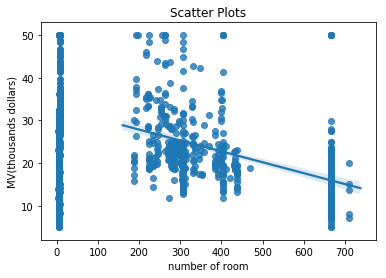

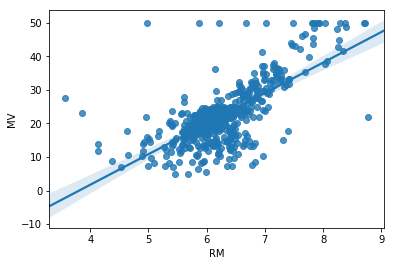

In [28]:
#Some simple discriptive statistics with MV and TAX

print("the mean of Median value of owner-occupied homes is :", df['MV'].mean(),  "thousands dollars")
print("the mean of average of numbers of room in owner-occupied units is :", df['RM'].mean())
print("the property tax rate (per 10,000 dallars) is ",df['TAX'].mean(), "dollars")

#Draw the Scatter Plot with TAX and MV
x=df.TAX
y=df.MV
plt.scatter(x, y) 
plt.xlabel('TAX(dollars)')
plt.ylabel('MV(thousands dollars)')
plt.title('Scatter Plots')
plt.show()
sns.regplot(x='TAX', y='MV', data=df)

#Draw the Scatter Plot with TAX and RM
x=df.RM
y=df.MV
plt.scatter(x, y) 
plt.xlabel('number of room')
plt.ylabel('MV(thousands dollars)')
plt.title('Scatter Plots')
plt.show()
sns.regplot(x='RM', y='MV', data=df)

#It seems like RM and MV have the linear relationship in the scatter plot.

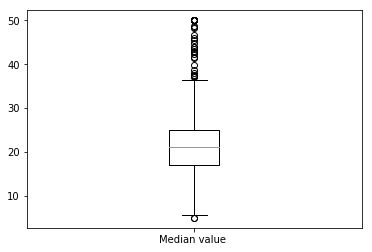

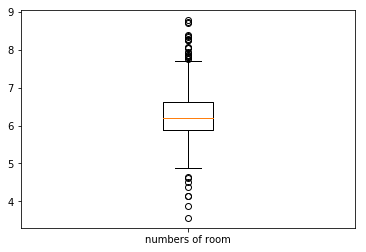

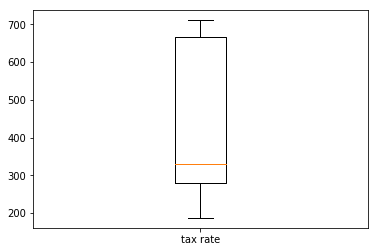

In [3]:
#Make the box plot
plt.boxplot([df.MV])
plt.gca().set_xticklabels(['Median value ']) 
plt.show()

plt.boxplot([df.RM])
plt.gca().set_xticklabels(['numbers of room']) 
plt.show()

plt.boxplot([df.TAX])
plt.gca().set_xticklabels(['tax rate']) 
plt.show()

In [26]:
#Linear regression of RM and TAX

#Split dataset into training and testing dataset
X = df.TAX
y = df.RM
random.seed(1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
results = smf.OLS(X_train, y_train).fit()
#Show the result
print(results.params)
results.summary()
print(results.summary())
#Generate predictions on X_test and call it yhat
y_hat = results.predict(X_test)
# Measure the mean square error (https://en.wikipedia.org/wiki/Mean_squared_error)
mse_error = np.mean((y_hat-y_test) ** 2)
# (c) Print the mean squared error
print("The mean square erroris::", mse_error)

RM    62.732542
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    TAX   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1645.
Date:                Sat, 15 Dec 2018   Prob (F-statistic):          6.09e-135
Time:                        03:35:36   Log-Likelihood:                -2348.7
No. Observations:                 354   AIC:                             4699.
Df Residuals:                     353   BIC:                             4703.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM            62.7325

[[ 0.12355087  0.10880936 -1.52830468  0.15126904]
 [ 0.23027283 -0.46638439 -0.82709975 -0.37372434]
 [ 1.37401797  1.3611111   0.80674238 -0.6839993 ]
 ...
 [ 1.50340659  1.07003002  0.57268548 -0.20835707]
 [-0.56524654 -0.61855444 -0.11945564  0.15759955]
 [-0.24494837 -0.46954872 -1.0092888   0.28424951]]


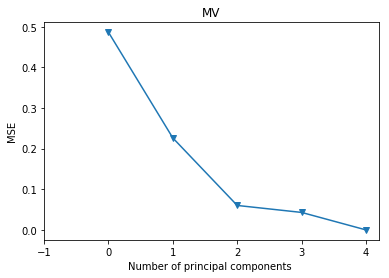

It seens like 2 components can explain all variables in the model as showed in the MSE plots
the mean squared error in this model is: 0.05555891982480217


In [25]:
#PCR fucntion to build the model with all variables 
pca = PCA()
# Split into training and test sets
X = df.values[:, 1:5]
Y = df.values[:,0]
random.seed(1)
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the data
X_train_reduced = pca.fit_transform(scale(X_train))
n = len(X_train_reduced)
print(X_train_reduced)
# 4-fold CV, with shuffle
kf_4 = model_selection.KFold (n_splits=4, shuffle=True, random_state=1)
lr= LinearRegression()
mse = []
# Calculate MSE with no principal component in PCR regression
score = -1*model_selection.cross_val_score(lr, np.ones((n,1)), y_train.ravel(), cv=kf_4, scoring='neg_mean_squared_error').mean()    
mse.append(score)
# Calculate the numbers of components in the PCR function
for i in np.arange(1, 5):
    score = -1*model_selection.cross_val_score(lr, X_train_reduced[:,:i], y_train.ravel(), cv=kf_4, scoring='neg_mean_squared_error').mean()
    mse.append(score)
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components ')
plt.ylabel('MSE')
plt.title('MV')
plt.xlim(xmin=-1)
plt.show()
print("It seens like 2 components can explain all variables in the model as showed in the MSE plots")
# Train regression model on training data with 2 components
X_test_reduced = pca.transform(scale(X_test))[:,:3]
lr.fit(X_train_reduced[:,:3], y_train)
# Prediction with test data
y_hat = lr.predict(X_test_reduced)
#Calculate the mean square error 
print ("the mean squared error in this model is:", mean_squared_error(y_test, y_hat))

